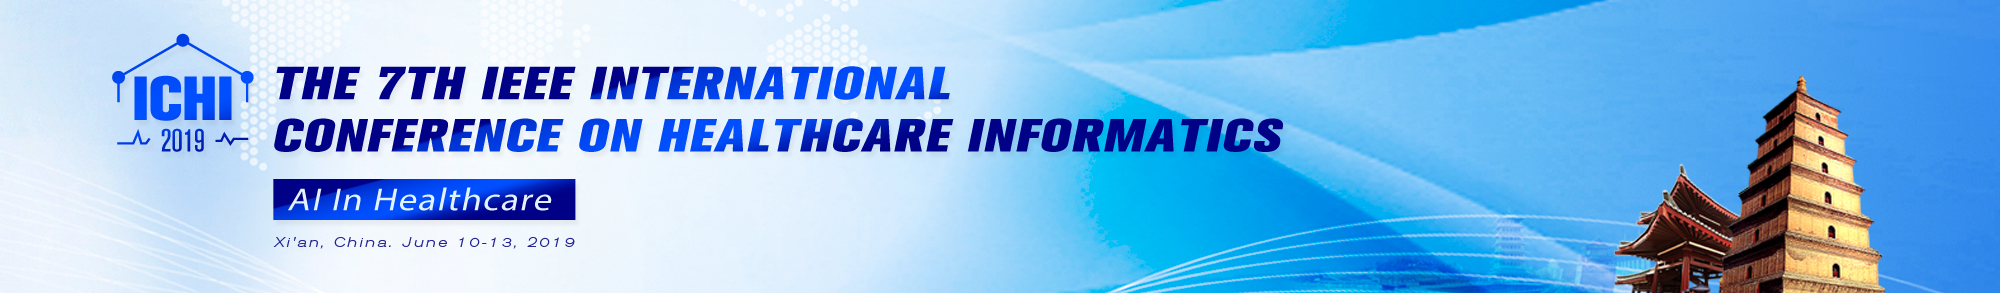

<h3>ICHI 2019 Tutorial - Translational Health Informatics Hands-on tutorial session</h3>

# From Risk Prediction Modeling to Risk Assessment Service

## Link: https://github.com/IEEE-ICHI/tutorial

<h2 style="background-color:#5596e6; color:#fff;">⭐️ Part 1 - Introduction to a <i>Statistical Machine Learning</i> Approach </h2>

## Step 0. Preparations

### Install required python packages

Running the following command will install/update listed Python packages using pip: `pandas scikit-learn matplotlib`

These packages are required to perform later analysis jobs.

In [1]:
! pip install -Uq pandas scikit-learn matplotlib

## Step 1. Loading data and pre-process

In this step, we will:
 - using package `pandas` to load the data from a CSV file (located at `../data/synthetic_data_series.csv`) into our program, and
 - doing some pre-process to make the dataset ready for our modeling process.
 
<span style="background-color:#111; color:#fff">
    <b>Notice:</b> The dataset used in this tutorial is <i>synthetic</i>. 
</span>

The dataset synthetic process:
 - is designed to be comply with HIPPA regulations and avoid any patient data privacy issue
 - is based on an real-world clinical problem, and designed to help researchers understand the clinical problem and modleing pipeline
 - tried to make the distribution of each feature same with real-world data, but **the analyis/modeling result is not meaningful for real-world use**.

### a) Read the sequence data using pandas

In [2]:
import pandas as pd
import numpy as np


df_series = pd.read_csv(
    '../data/synthetic_data_series.csv',
    index_col=0,
    dtype={'visit_date': str}
)

### b) Peek the loaded data

Execute the code in cell below to take a look at the first 10 rows of the loaded data.

This dataset include the synthetic patients records of in sequences:
 - Each row represent a record of of patients' encounter
 - Given a patients, he/she may have multiple records (encounter) in the dataset
 - Column `patient_id` is an identifier for patient
 - Column `visit_date` indicates the encounter date

In [3]:
df_series.head(n=10)

,patient_id,visit_date,age,sbp,dbp,CurrentSmoking,CurrentDrinking,historyOfHypertension,height,weight,hba1c,total_cholesterol,ldl_c,hdl_c,ascvd
record_id,,,,,,,,,,,,,,,
0,P_001,20150227,67.798380,137.846712,82.172802,1.0,1.0,1.0,176.123209,64.168104,10.752250,4.954267,3.207282,2.454508,0.0
1,P_001,20160531,69.055123,136.092495,63.129122,1.0,1.0,1.0,176.123209,64.168104,6.717141,6.543688,4.282093,2.299544,1.0
2,P_002,20151105,54.845823,127.846026,80.722764,0.0,1.0,1.0,161.508699,71.228024,17.284954,2.102130,1.321620,1.283189,0.0
3,P_002,20160913,55.703526,120.929172,70.484064,0.0,1.0,1.0,161.508699,71.228024,14.454307,1.170665,0.758518,1.370748,0.0
4,P_002,20180101,57.006217,131.141639,67.910170,0.0,1.0,1.0,161.508699,71.228024,15.171708,1.304639,0.847746,1.746102,0.0
5,P_003,20170719,62.336208,119.848049,66.284250,1.0,1.0,1.0,163.997850,70.496251,20.783836,1.389095,0.920079,1.792870,0.0
6,P_003,20170807,62.388957,137.377183,68.617232,1.0,1.0,1.0,163.997850,70.496251,12.848024,0.582666,0.343652,1.605832,0.0
7,P_004,20150322,72.630331,132.367250,67.337019,1.0,0.0,1.0,159.228934,71.742820,15.844065,1.473982,1.028665,1.940458,0.0
8,P_004,20150826,73.060982,122.685742,73.081761,1.0,0.0,1.0,159.228934,71.742820,11.286795,0.710345,0.530057,1.928121,0.0


As displayed above, the loaded dataset is `series data`:
 - each record represent a patient encounter
 - each patient has multiple encounter (or multple records)
 
In this part of tutorial session, we wil simpilify the modeling problem as: `given a patient's most recent status, what is his/her risk of encounter some adverse event`.


In the dataset, the last column, `ascvd`, represents the target of our risk prediction model: `Atherosclerotic Cardiovascular Disease`. Researchers has already built some widely used tools to assess the risk of `ASCVD`, e.g.: 
 - http://tools.acc.org/ASCVD-Risk-Estimator-Plus/#!/calculate/estimate/
 - https://www.mdcalc.com/ascvd-atherosclerotic-cardiovascular-disease-2013-risk-calculator-aha-acc

### c) Aggregate the data series by `patient_id`

Given that each patient has multiple records in the dataset, we firstly aggregate each patients's records.

In this example, we simply select the last (the most recent) record of each patients as his/her current status to build the model.

While other aggregation methods are avaiable (e.g.: mean value), the limiation of all these methods are ignoring some information of patients' all records in historical data. In the next part, we will learn how to apply Recurrent Neural Netowrk (LSTM) to take patients' all records into consideration when modeling, instead of aggreated the records. 

In [4]:
df = df_series.groupby(df_series['patient_id']).last()

df.head(10)

,visit_date,age,sbp,dbp,CurrentSmoking,CurrentDrinking,historyOfHypertension,height,weight,hba1c,total_cholesterol,ldl_c,hdl_c,ascvd
patient_id,,,,,,,,,,,,,,
P_001,20160531,69.055123,136.092495,63.129122,1.0,1.0,1.0,176.123209,64.168104,6.717141,6.543688,4.282093,2.299544,1.0
P_002,20180101,57.006217,131.141639,67.910170,0.0,1.0,1.0,161.508699,71.228024,15.171708,1.304639,0.847746,1.746102,0.0
P_003,20170807,62.388957,137.377183,68.617232,1.0,1.0,1.0,163.997850,70.496251,12.848024,0.582666,0.343652,1.605832,0.0
P_004,20180917,76.122162,119.337148,78.725826,1.0,0.0,1.0,159.228934,71.742820,21.260639,2.966923,1.951110,2.056739,0.0
P_005,20181203,72.600499,122.470828,66.619738,0.0,1.0,1.0,180.112997,67.754964,7.291750,3.170672,2.003275,2.014797,1.0
P_006,20181206,44.158783,132.734743,87.486159,1.0,1.0,1.0,170.326656,59.034342,9.707983,4.494409,2.941425,1.364406,0.0
P_007,20170922,62.229328,120.715502,71.990929,1.0,1.0,1.0,173.226561,68.410429,13.265627,6.984477,4.561652,2.531598,1.0
P_008,20170730,51.067188,125.193442,87.603300,0.0,0.0,1.0,161.613268,73.006283,11.699049,0.787439,0.547165,1.613062,0.0
P_009,20190220,53.109036,122.872779,83.413732,1.0,0.0,1.0,175.607838,63.009373,7.098974,4.470924,2.978564,1.492386,0.0


Here, we will ignore the `visit_date` column, since the age column already indicates the patient's when the encounter happens.

In [5]:
df.drop(columns=['visit_date'], inplace=True)

### d) Split the dataset into two parts - training / testing set

After data aggregation, we found that the dataset include records of 700 unique patients.

To take advantage of the dataset, we are going to split the dataset into two exclusive parts here:
 - Training set - this part of dataset will be used to build a prediction model. Like its name, it's used to let a machine learning algorithm to "learn" the pattern from the data.
 - Testing set  - this part of dataset will be used to validate the model. Like its name, after we have a model which "learned" the pattern from the training set, let's use this part to "test" if the model perform well on the testing set.
 
 
In this example, we will use 80% of the dataset to train the model, and 20% of the dataset to test the model.
 
You can find detail information about the training/testing split method here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
df_X = df.drop(['ascvd'],axis=1)
df_y = df['ascvd']

In [7]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.20)

## Step 2. Build a risk prediction model - Logistic Regression

In this step, let's use the simple algorithm, **`Logistic Regression`**, to build a risk prediction, and understand how is a simple risk predcition model built, and how can we use it in clinical decision support.

### a) Import required Python package and module

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### b) Build a simple Logistic Regression risk prediction model

In [9]:
model_lr = LogisticRegression(solver='lbfgs', max_iter=10e6)
model_lr.fit(df_X_train, df_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000.0,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### c) Peek the predcition result of the built model on testing data

In [10]:
df_y_pred_lr = model_lr.predict(df_X_test)                  # predicted class of ascvd: 1 or 0
df_P_pred_lr = model_lr.predict_proba(df_X_test)[:, 1]      # probablity = exp(log_probability)

In [11]:
pd.DataFrame.from_dict(dict(
    y_actural=df_y_test,
    y_pred=df_y_pred_lr,
    y_pred_prab=df_P_pred_lr
)).head(10)

,y_actural,y_pred,y_pred_prab
patient_id,,,
P_324,0.0,0.0,0.334672
P_435,1.0,1.0,0.986438
P_110,1.0,1.0,0.807103
P_175,0.0,0.0,0.200604
P_550,0.0,0.0,0.424075
P_138,1.0,1.0,0.751216
P_434,1.0,1.0,0.904502
P_480,0.0,0.0,0.286629
P_100,0.0,0.0,0.076951


### d) Measure the performance of built Logistic Regression model on testing set

In [12]:
accuracy_lr = model_lr.score(df_X_test, df_y_test)
logit_roc_auc_lr = metrics.roc_auc_score(df_y_test, df_y_pred_lr)
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(df_y_test, df_P_pred_lr)

print('Accuracy=%.4f \t AUC=%.4f' % (accuracy_lr, logit_roc_auc_lr))

Accuracy=0.7786 	 AUC=0.7665


Let's also plot the ROC curve based on `fpr_lr` and `tpr_lr`.

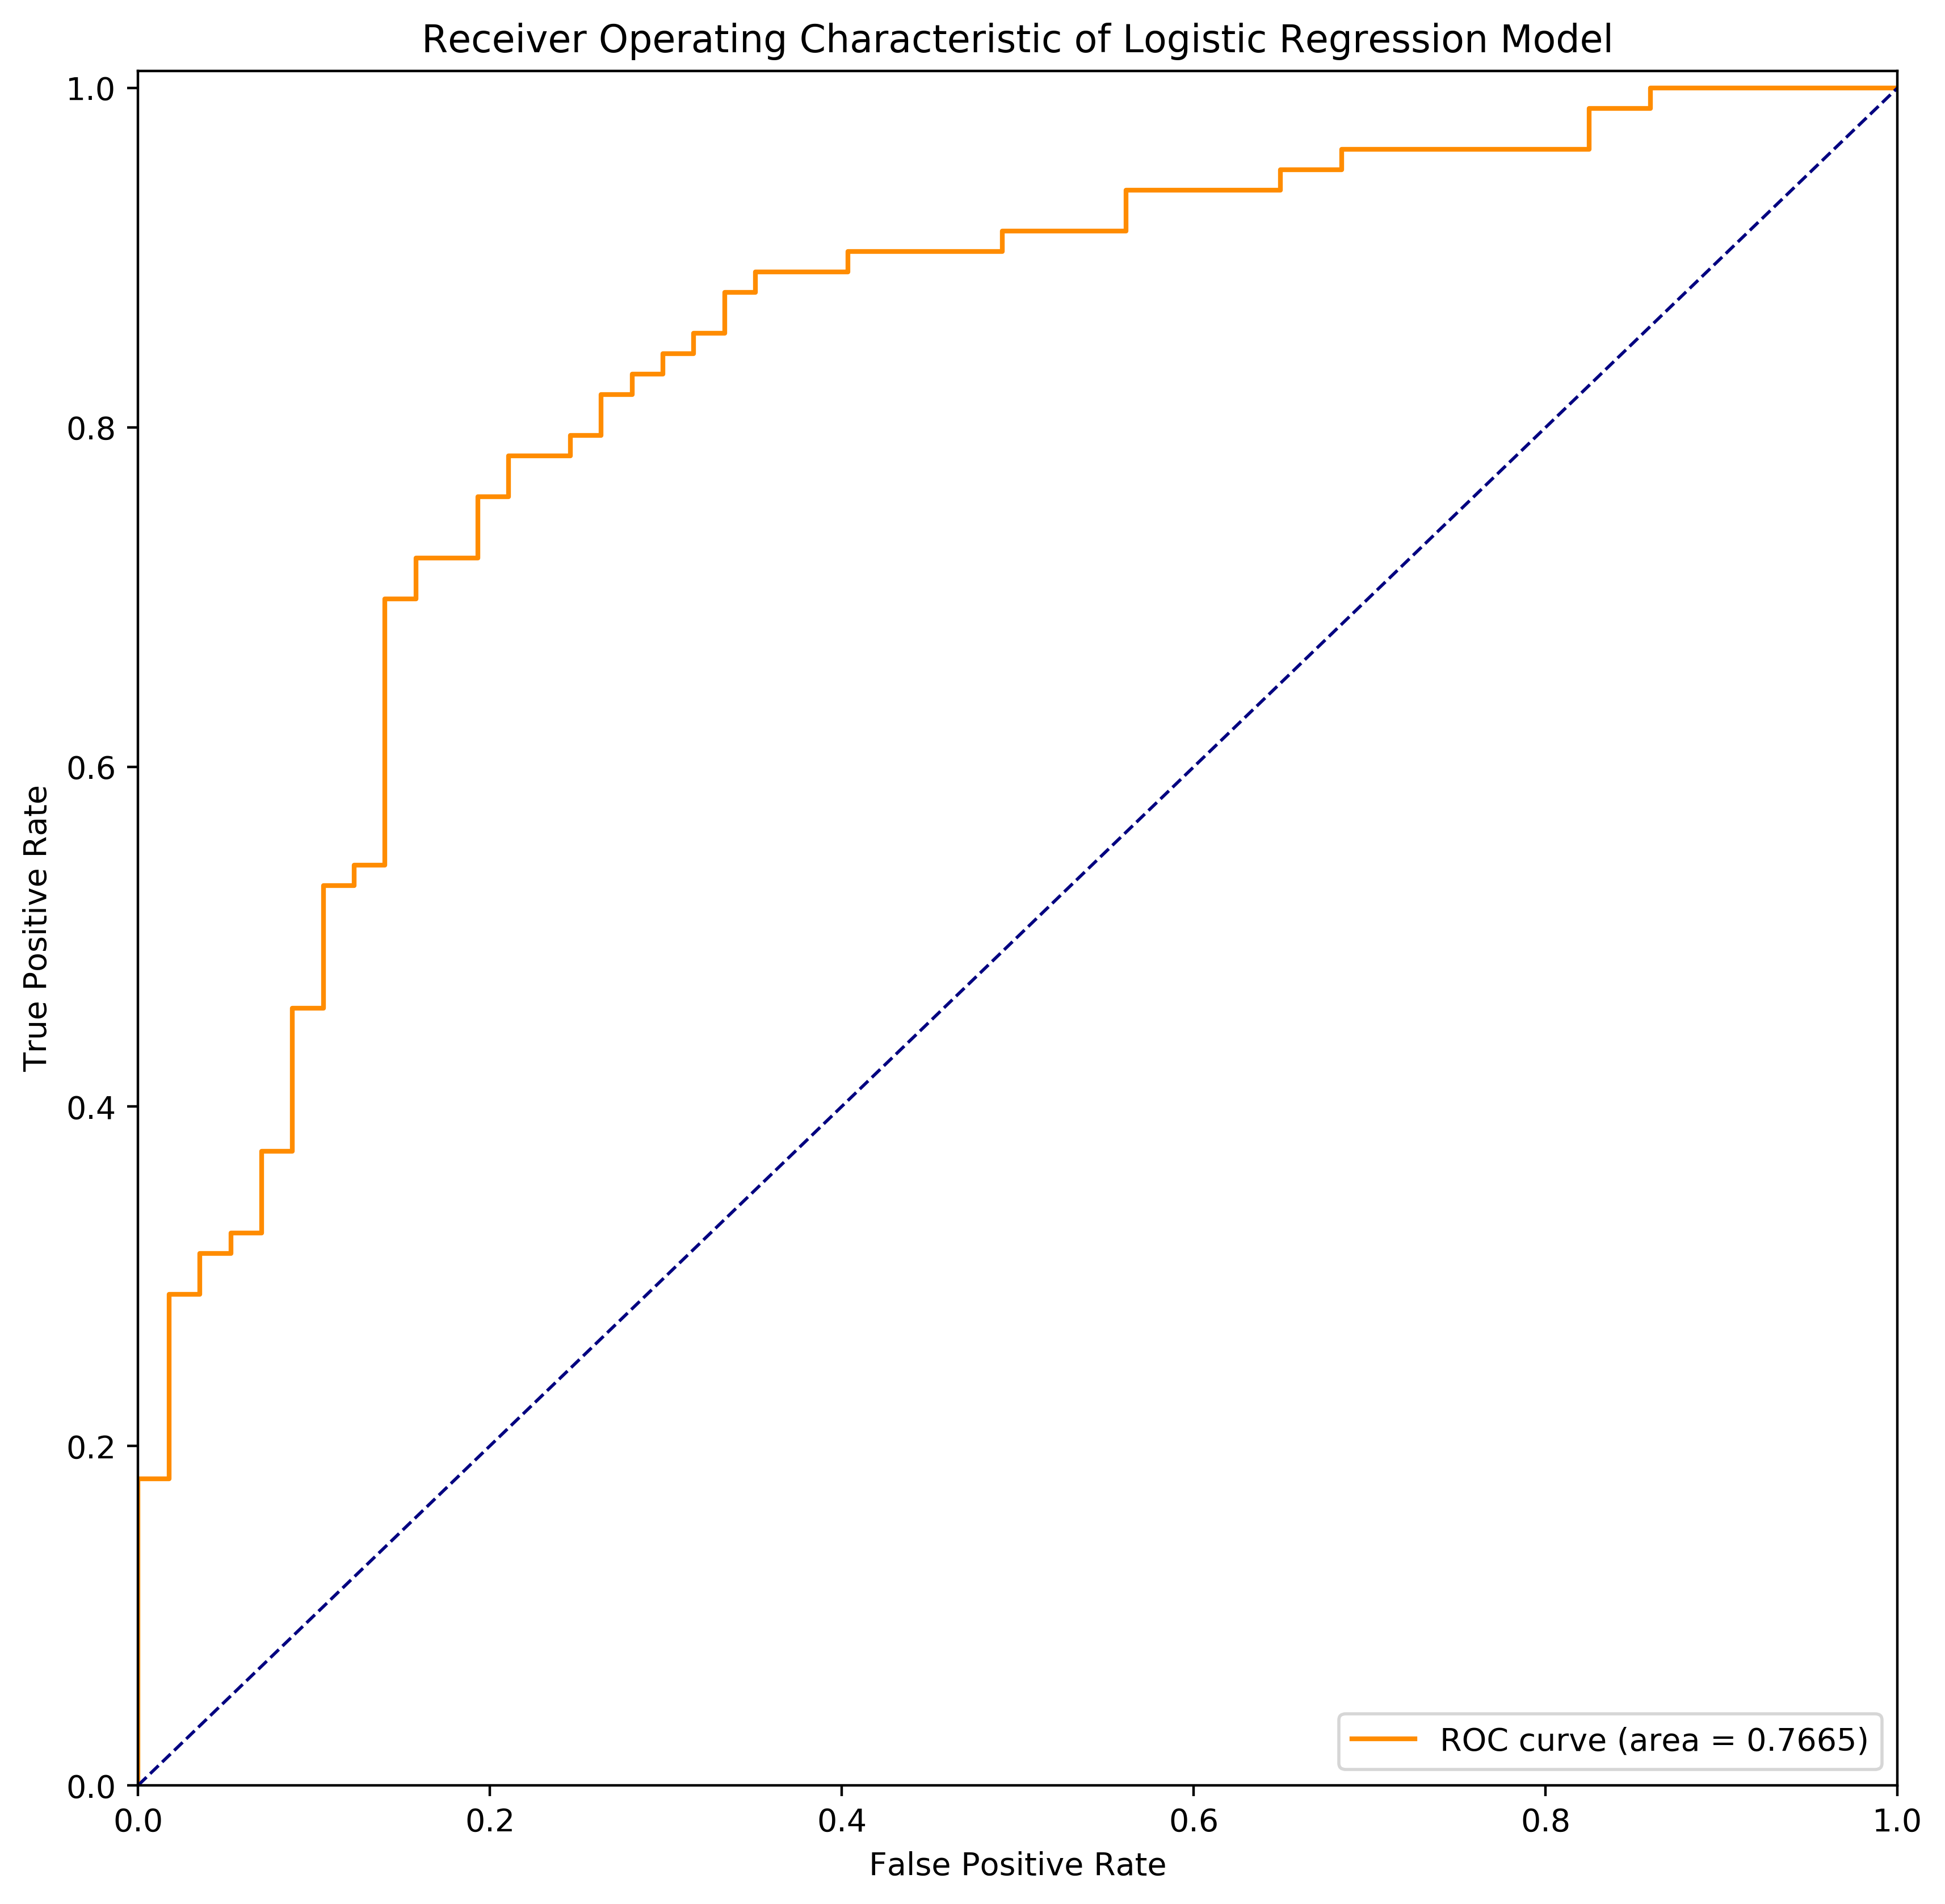

In [13]:
%matplotlib inline

from figure import plot_roc_curve
plot_roc_curve(fpr_lr, tpr_lr, logit_roc_auc_lr, title='Logistic Regression Model')

## Step.3 Random Forest - A little bit more compilicated algorithm

### a) Import required Python package and module

In [14]:
from sklearn.ensemble import RandomForestClassifier

### b) Build a simple Random Forest risk prediction model

In [15]:
model_rf = RandomForestClassifier(
    # random_state=0,
    max_features = 'sqrt',
    n_estimators=10,  # create the model with 10 trees
    max_depth=5       # tree in the RF should have depth no more than 5
)

model_rf.fit(df_X_train, df_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### c) Peek the predcition result of the built model on testing data

In [16]:
df_y_pred_rf = model_rf.predict(df_X_test)
df_P_pred_rf = model_rf.predict_proba(df_X_test)[:, 1]

In [17]:
pd.DataFrame.from_dict(dict(
    y_actural=df_y_test,
    y_pred=df_y_pred_rf,
    y_pred_prab=df_P_pred_rf
)).head(10)

,y_actural,y_pred,y_pred_prab
patient_id,,,
P_324,0.0,0.0,0.389767
P_435,1.0,1.0,0.967383
P_110,1.0,1.0,0.607751
P_175,0.0,0.0,0.247834
P_550,0.0,0.0,0.446787
P_138,1.0,1.0,0.635326
P_434,1.0,1.0,0.824347
P_480,0.0,0.0,0.488397
P_100,0.0,0.0,0.157346


### d) Measure the performance of built Logistic Regression model on testing set

In [18]:
accuracy_rf = model_rf.score(df_X_test, df_y_test)
logit_roc_auc_rf = metrics.roc_auc_score(df_y_test, df_y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(df_y_test, df_P_pred_rf)

print('Accuracy=%.4f \t AUC=%.4f' % (accuracy_rf, logit_roc_auc_rf))

Accuracy=0.7357 	 AUC=0.7139


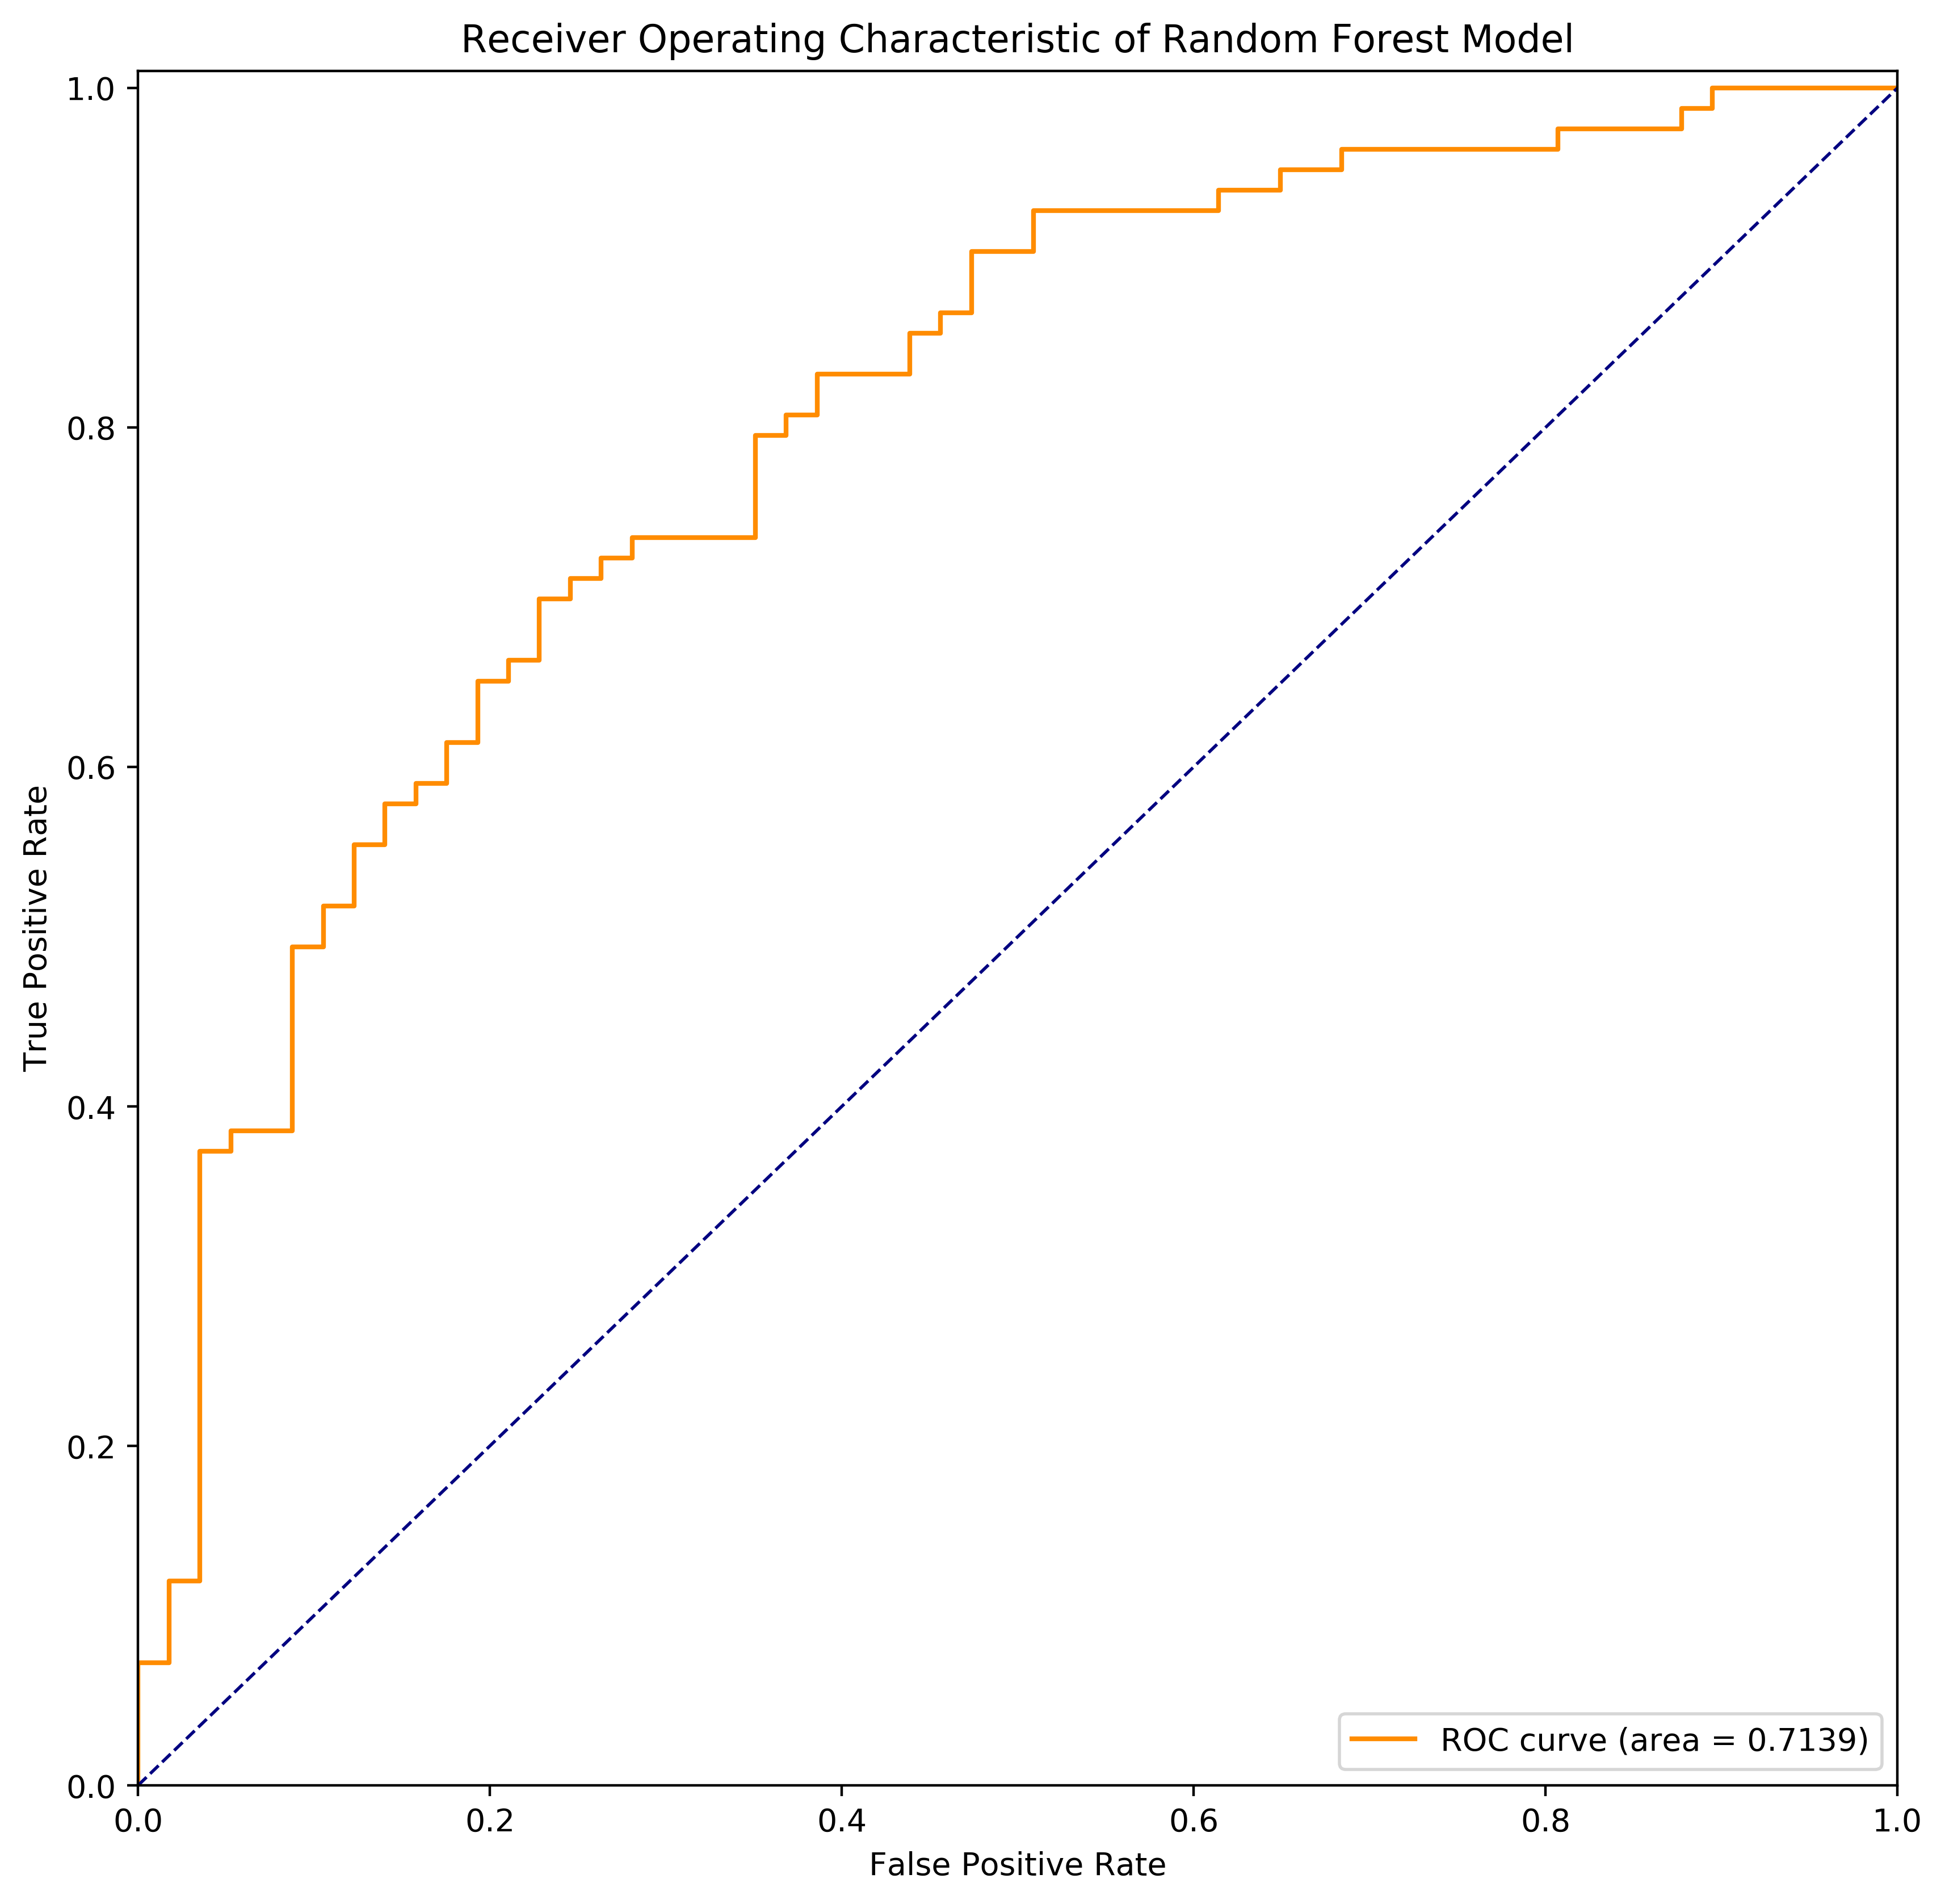

In [19]:
%matplotlib inline

from figure import plot_roc_curve
plot_roc_curve(fpr_rf, tpr_rf, logit_roc_auc_rf, title='Random Forest Model')

### Notice - About model performance

Since we are using synthetic data, the performance of the two models built above is not meaningful.

In real-world cases, models built with Random Forest algorithm ususally perform better than Logistic Regression, especially when Random Forest models' parameters are tuned.

## Step 4. Save the model for later use, and load model to do a prediction task

### a) Save the model to a file

For later use, let's save the trained Logisitic Regression model to a file, so that you can use it later without training it again. You can also copy this model to other computers to use it in an applicaiton.


Here, we will save the model as a file: `./lr.model`.

In [20]:
import joblib

joblib.dump(
    model_lr,
    filename='./lr.model',
    compress=9
)

['./lr.model']

### b) Use the model without re-training and original data

Now let's assume you copy the model to another computer and you want to use it. It's pretty simple to use the model!

In this new envioronment, simply install required pthon packages with `pip install -Uq scikit-learn numpy`, and you will be able to use it. Yes, it's just two lines of code:

In [21]:
import joblib

model_loaded = joblib.load('./lr.model')

### c) Use the model to do some prediction

Now you have loaded the model to variable `model_loaded`. You can now create a patient record and let the model to predict this patient's risk of ASCVD. Notice that the order of following features (columns) must be same as the training data.

In [22]:
test_record = np.array([
    ('age',                       73.9149),
    ('sbp',                       126.569),
    ('dbp',                       79.3895),
    ('CurrentSmoking',                  0),
    ('CurrentDrinking',                 1),
    ('historyOfHypertension',           1),
    ('height',                     168.32),
    ('weight',                      82.96),
    ('hba1c',                     9.65685),
    ('total_cholesterol',          3.0618),
    ('ldl_c',                     2.02646),
    ('hdl_c',                     1.94513),
])

After you have created the record, use the code below to do the risk prediciton task.

The `test_values` variable simply extract the numeric values from `test_record` to fit the model's requirement.

After the prediciton, the prediction result is printed at last.

In [23]:
test_values = test_record[:,1].astype(np.float32)

predicted_class = model_loaded.predict([test_values])[0]
predicted_prob  = model_loaded.predict_proba([test_values])[0][1]


print(
    'The risk prediciton result for the given record is %d, with a risk score (probability) of %.2f.' % (
        int(predicted_class),
        predicted_prob
    )
)

The risk prediciton result for the given record is 1, with a risk score (probability) of 0.77.


## Acknowledgement

This notebook is prepared by [IBM Research China](http://research.ibm.com/labs/china/) AI for Healthcare team.